## ***``ANONA Analysis on India's COVID-19 dataset``***

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import scipy
import statsmodels

In [2]:
pd.set_option('display.max_rows',50)

In [3]:
state_dly_cases = pd.read_csv("Datasets/covid_19_india.csv")

In [4]:
state_dly_cases.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
8481,8482,16/11/20,8:00 AM,Telengana,-,-,242084,1407,257876
8482,8483,16/11/20,8:00 AM,Tripura,-,-,30555,364,31962
8483,8484,16/11/20,8:00 AM,Uttarakhand,-,-,62543,1107,68215
8484,8485,16/11/20,8:00 AM,Uttar Pradesh,-,-,480965,7372,511304
8485,8486,16/11/20,8:00 AM,West Bengal,-,-,394576,7661,431551


In [81]:
state_ws_test = pd.read_csv("Datasets/StatewiseTestingDetails.csv")

In [82]:
state_ws_test.tail()

,Date,State,TotalSamples,Negative,Positive
7307,2020-11-11,West Bengal,5047335.0,NaN,NaN
7308,2020-11-12,West Bengal,5091700.0,NaN,NaN
7309,2020-11-13,West Bengal,5136012.0,NaN,NaN
7310,2020-11-14,West Bengal,5180139.0,NaN,NaN
7311,2020-11-15,West Bengal,5218797.0,NaN,NaN


In [7]:
india_pop = pd.read_csv("Datasets/population_india_census2011.csv.txt")

In [8]:
india_pop.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


#### **Exploring the Statewise Testing Dataset**

In [9]:
state_ws_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7312 entries, 0 to 7311
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          7312 non-null   object 
 1   State         7312 non-null   object 
 2   TotalSamples  7312 non-null   float64
 3   Negative      3996 non-null   object 
 4   Positive      4758 non-null   float64
dtypes: float64(2), object(3)
memory usage: 285.8+ KB


In [94]:
state_ws_test.dtypes

Date            datetime64[ns]
State                   object
TotalSamples           float64
Negative                object
Positive               float64
dtype: object

In [93]:
state_ws_test['Date'] = pd.to_datetime(state_ws_test['Date'])

In [79]:
state_ws_test.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [70]:
state_ws_test.dtypes

Date            datetime64[ns]
State                   object
TotalSamples           float64
Negative                object
Positive               float64
dtype: object

In [96]:
state_ws_test['Month'] = state_ws_test['Date'].apply(lambda row : row.month)

In [107]:
state_ws_test[(state_ws_test['Month'] == 11) & (~state_ws_test['Negative'].isna())].head()

,Date,State,TotalSamples,Negative,Positive,Month
392,2020-11-02,Andhra Pradesh,8182266.0,7354384,NaN,11
393,2020-11-03,Andhra Pradesh,8266800.0,7436069,NaN,11
394,2020-11-04,Andhra Pradesh,8342265.0,7509057,NaN,11
395,2020-11-05,Andhra Pradesh,8427629.0,7591676,NaN,11
396,2020-11-06,Andhra Pradesh,8507230.0,7668867,NaN,11


In [108]:
state_ws_test[(state_ws_test['Month'] == 11) & (state_ws_test['Negative'].isna())].head(5)

,Date,State,TotalSamples,Negative,Positive,Month
171,2020-11-01,Andaman and Nicobar Islands,89559.0,NaN,4340.0,11
172,2020-11-02,Andaman and Nicobar Islands,90901.0,NaN,4352.0,11
173,2020-11-03,Andaman and Nicobar Islands,92249.0,NaN,4372.0,11
174,2020-11-04,Andaman and Nicobar Islands,93406.0,NaN,4389.0,11
175,2020-11-05,Andaman and Nicobar Islands,94639.0,NaN,4403.0,11


In [34]:
state_ws_test[state_ws_test['Positive']==1].sort_values(by='Date',ascending=False)

,Date,State,TotalSamples,Negative,Positive
5897,2020-06-02,Sikkim,3788.0,2857,1.0
4603,2020-06-01,Mizoram,896.0,NaN,1.0
5896,2020-06-01,Sikkim,3525.0,2601,1.0
4602,2020-05-31,Mizoram,777.0,NaN,1.0
5895,2020-05-31,Sikkim,2925.0,2173,1.0
...,...,...,...,...,...
4556,2020-04-09,Mizoram,84.0,NaN,1.0
407,2020-04-09,Arunachal Pradesh,206.0,185,1.0
4555,2020-04-08,Mizoram,74.0,NaN,1.0
4554,2020-04-07,Mizoram,58.0,0,1.0


In [77]:
state_ws_test.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [51]:
state_ws_test.sort_values(by='Date',ascending=False)

,Date,State,TotalSamples,Negative,Positive
2964,2020-11-16,Jammu and Kashmir,2660991.0,2557982,NaN
406,2020-11-16,Andhra Pradesh,9197307.0,8342543,NaN
5211,2020-11-16,Odisha,5294726.0,NaN,NaN
6863,2020-11-16,Uttar Pradesh,17122647.0,NaN,NaN
6640,2020-11-16,Tripura,494627.0,462668,31959.0
...,...,...,...,...,...
5423,2020-04-02,Punjab,1434.0,NaN,37.0
1863,2020-04-02,Goa,220.0,197,5.0
3405,2020-04-01,Kerala,7965.0,7256,265.0
7087,2020-04-01,West Bengal,659.0,568,37.0


c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\rajsh\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<AxesSubplot:>

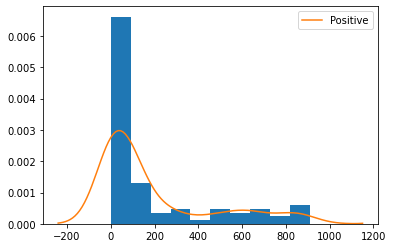

In [50]:
plt.hist(x='Positive',data=state_ws_test[state_ws_test['State'] =='Sikkim'].sort_values(by='Date'),density=True)
sns.kdeplot(data=state_ws_test[state_ws_test['State'] =='Sikkim'].sort_values(by='Date')['Positive'])

In [31]:
state_ws_test['State'][state_ws_test['Positive']==1].unique()

array(['Arunachal Pradesh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Mizoram', 'Sikkim'], dtype=object)

In [22]:
state_ws_test[~state_ws_test['Negative'].isna()]

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
186,2020-04-02,Andhra Pradesh,1800.0,1175,132.0
187,2020-04-10,Andhra Pradesh,6374.0,6009,365.0
188,2020-04-11,Andhra Pradesh,6958.0,6577,381.0
189,2020-04-12,Andhra Pradesh,6958.0,6553,405.0
...,...,...,...,...,...
7083,2020-11-12,Uttarakhand,1181225.0,1088412,NaN
7084,2020-11-13,Uttarakhand,1189033.0,1099791,NaN
7085,2020-11-14,Uttarakhand,1192231.0,1103728,NaN
7086,2020-11-15,Uttarakhand,1195851.0,1107601,NaN
